### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
 df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### White Noise

In [6]:
wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(),size = len(df))

In [7]:
df['wn'] = wn

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


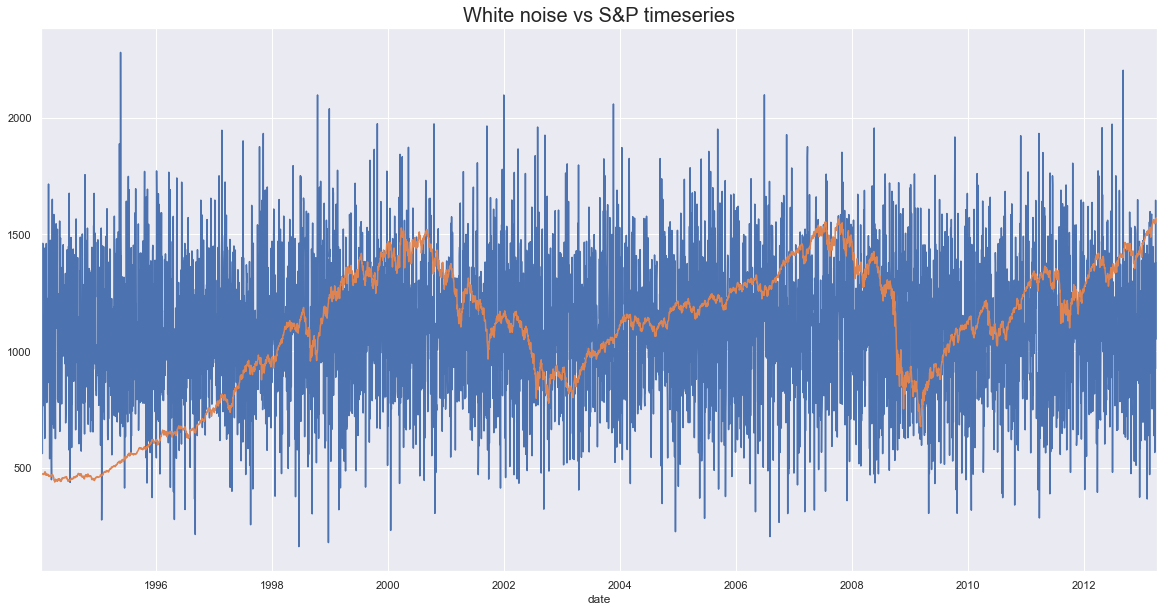

In [8]:
df.wn.plot(figsize = (20,10));
df.market_value.plot()
plt.title('White noise vs S&P timeseries',size = 20);

### Random Walk

In [9]:
rw = pd.read_csv('RandWalk.csv')

In [10]:
rw.date = pd.to_datetime(rw.date,dayfirst = True)
rw.set_index('date',inplace = True)
rw = rw.asfreq('b')

In [11]:
df['rw'] = rw.price

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,894.989516,1122.139662
1994-01-10,475.27,913.091771,1080.347860
1994-01-11,474.13,1356.280301,1082.095245
1994-01-12,474.17,778.064340,1083.639265
1994-01-13,472.47,845.505483,1067.146255


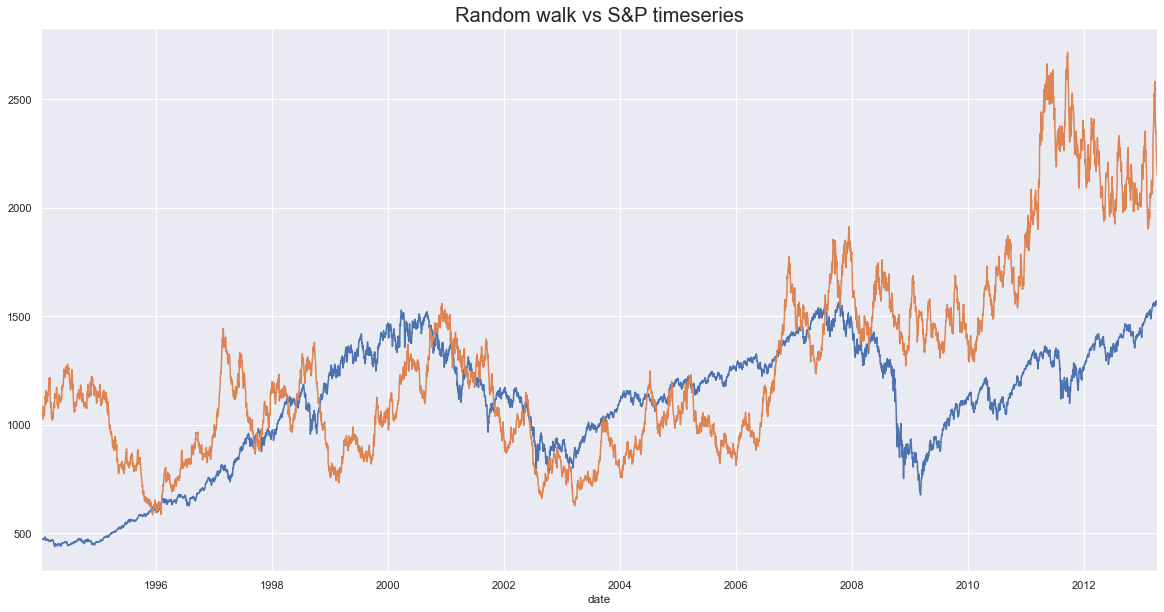

In [13]:
df.market_value.plot(figsize = (20,10));
df.rw.plot()
plt.title('Random walk vs S&P timeseries',size = 20);

### Stationarity

In [42]:
sts.adfuller(df.wn)

(-70.88710926934102,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70813.16604514296)

### Seasonality

In [51]:
s_dec_additive = seasonal_decompose(df.rw, model = 'additive')

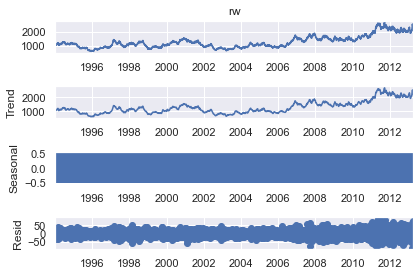

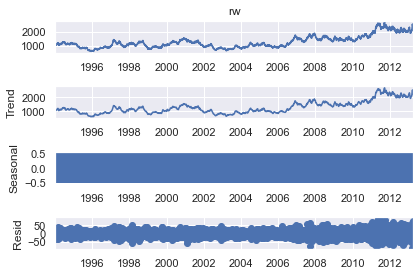

In [52]:
s_dec_additive.plot()

### ACF

Text(0.5, 1.0, 'ACF S&P')

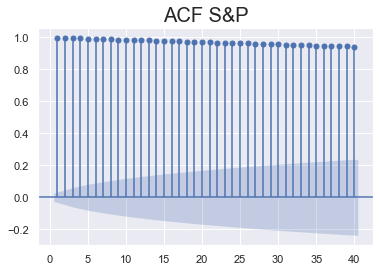

In [60]:
sgt.plot_acf(df.market_value, lags = 40,zero = False)
plt.title('ACF S&P', size =20)

### PACF

Text(0.5, 1.0, 'PACF S&P')

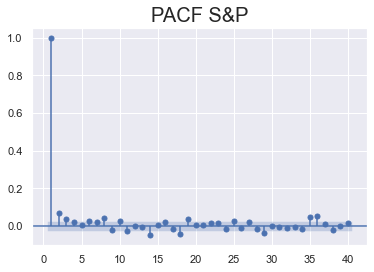

In [65]:
sgt.plot_pacf(df.market_value, lags = 40,zero = False,method = 'ols')
plt.title('PACF S&P', size =20)

Text(0.5, 1.0, 'PACF Random Walk')

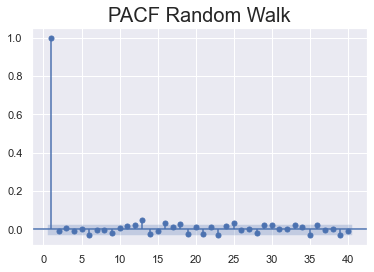

In [64]:
sgt.plot_pacf(df.rw, lags = 40,zero = False,method = 'ols')
plt.title('PACF Random Walk', size =20)

In [14]:
from statsmodels.tsa.arima_model import ARMA

In [82]:
model_ar_3 = ARMA(df.market_value,order = (3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 20 Jul 2022   AIC                          40174.694
Time:                        14:54:23   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1056.7902    259.087      4.079      0.000     548.989    1564.592
ar.L1.market_value     0.9277      0.014     68.256      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0506           -5.3049j            5.4080           -0.2811
AR.3           -1.0506           +5.3049j            5.4080            0.2811
-----------------------------------------------------------------------------
"""

In [78]:
model_ar_1 = ARMA(df.market_value,order = (1,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 20 Jul 2022   AIC                          40200.776
Time:                        14:52:17   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1061.0287    228.279      4.648      0.000     613.611    1508.447
ar.L1.market_value     0.9994      0.001   1911.943      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""